In [15]:
import tensorflow 
import keras
import keras.backend as K
#Reading the model from JSON file
with open('model.json', 'r') as json_file:
    json_savedModel= json_file.read()
#load the model architecture 
model_j = keras.models.model_from_json(json_savedModel)
model_j.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 128, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 128, 64)       640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 32, 128)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 32, 256)        295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 32, 256)        5900

In [2]:
import matplotlib.pyplot as plt  

In [3]:
model_j.load_weights('model.h5')

In [4]:
def resize_words(img, imgSize = (128, 32)):
    (wt, ht) = imgSize
    h, w = img.shape[:2]
    fx = w / wt
    fy = h / ht
    f = max(fx, fy)
    newSize = (max(min(wt, int(w / f)), 1), max(min(ht, int(h / f)), 1)) 
    img = cv2.resize(img, newSize)
    mask = np.ones([ht, wt]) * 255
    mask[0:newSize[1], 0:newSize[0]] = img
    return cv2.resize(mask, imgSize, interpolation = cv2.INTER_AREA)

In [10]:
import cv2
import numpy as np
test_imag = resize_words(cv2.imread('C:/Users/luqman/Desktop/IT/Intern with Nisar Bhai/English Handwritten Recognition/Scanned doc text detection and segmentation/segmentation/word segment images/line_5.jpg/4.jpg', 0))

In [11]:
t_image = np.expand_dims(test_imag, axis = 2)
_image = t_image/255.
st_image1 = np.asarray(_image)
test_age2 = st_image1[np.newaxis]

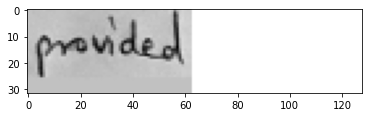

In [12]:
plt.imshow(test_imag, cmap='gray')

In [1]:
import string
char_list = string.ascii_letters+string.digits+string.punctuation
 
def encode_to_labels(tex):
    # encoding each output word into digits
    dig_lst = []
    for index, char in enumerate(tex):
        try:
            dig_lst.append(char_list.index(char))
        except:
            print(char)
        
    return dig_lst

In [14]:
predict = model_j.predict(test_age2)
out = K.get_value(K.ctc_decode(predict, input_length=np.ones(predict.shape[0])*predict.shape[1], greedy=True)[0][0])
 
# see the results
i = 0
for x in out:
    #print("original_text =  ", valid_orig_txt[i])
    print("predicted text = ", end = '')
    for p in x:  
        if int(p) != -1:
            print(char_list[int(p)], end = '')       
    print('\n')
    i+=1


predicted text = provided

